In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [62]:
BASE_YEAR = 1990
def convert_quarter_to_month(x):
    year = int(x.split('-')[0])
    quarter = int(x.split('Q')[-1])
    feature = (year-BASE_YEAR)*4 + quarter-1
    return feature

Ordinary least squares method for linear regression

Y=β0+β1X

β1=∑(xi−x¯)(yi−y¯) / ∑(xi−x¯)2

β0=y¯−β1x¯

In [63]:
def ordinary_least_squares(x,y):
    mean_x = x.mean()
    mean_y = y.mean()
    b = sum((x-mean_x)*(y-mean_y))/sum((x-mean_x)**2)
    a = mean_y - b*mean_x
    return (a,b)

## Linear Regression using ordinary least squares method for single variable

### Change in housing prices over time


In [202]:
df = pd.read_csv('housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv')
df['quarter_feature'] = df['quarter'].apply(convert_quarter_to_month)
#df['exchange_rate'] = df['quarter'].apply(lambda x: quarter_to_exchange_rate(x,df2))
X = df['quarter_feature']
Y = df['index']
a,b = ordinary_least_squares(X,Y)
df = df.truncate(after=100)
print(a,b)

31.641403286978488 1.0123009703761918


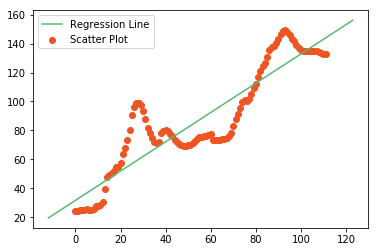

In [65]:
min_x = min(X) - 12
max_x = max(X) + 12
x = np.linspace(min_x, max_x, 1000)
y = a + b * x
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
plt.legend()
plt.show()

##     Linear regression using Gradient Descent 

### Relationship between housing prices, exchange rate and time 

In [318]:

def date_to_quarter(x):
    year,month = [int(a) for a in x.split('-')[:2]]
    if month < 4:
        quarter = 1
    elif month < 7:
        quarter = 2
    elif month < 10:
        quarter = 3
    else:
        quarter = 4
    return (year-BASE_YEAR)*4 + quarter -1

def get_max_exchange_quarter(x,df):
    exchange_rates_in_quarter = df.loc[df['quarter_feature']==x]
    while len(exchange_rates_in_quarter.index) == 0:
        x=x-1
        exchange_rates_in_quarter = df.loc[df['quarter_feature']==x]
    exchange = exchange_rates_in_quarter.iloc[-1]['exchange_rate_usd']
    return exchange
    

Cost function J: 
1/(2m) * ∑(y-h(x))^2 

where m = number of training examples
      y = y value of training example
      h(x) = derived y value

Gradient Descent:

(Given x_0 = 1)
theta_i = 1/m * ∑(y-h(x)) * x_i
theta = 1/m * ∑(y-h(x)) * x

In [330]:
def J(Y,Hx):
    return np.sum(np.square(Y-Hx)) / 2 / Y.shape[0]

    
def gradient_descent(X,Y,num_features,starting_thetas = None,learning_rate=0.000001,iterations=1000):
    m = Y.shape[0]
    if starting_thetas is None:
        starting_thetas = [0] * (num_features+1)
    thetas = np.array(starting_thetas)[:,np.newaxis]
    
    ones = np.ones(m)[:,np.newaxis]
    #Add ones in front of X for theta_0
    X2 = np.concatenate((ones,X),axis=1)
    costs = []
    for i in range(iterations):
        #thetas: num_features x 1
        #X2: m x num_features
        Hx = np.dot(X2,thetas)
        cost = J(Y,Hx)
        dy = 1/Y.shape[0] * np.dot(X2.T,Y-Hx)
        thetas = thetas + learning_rate * dy

        costs.append(cost)
        
    return thetas,costs

Thetas: [[0.09885148]
 [1.49663121]
 [0.1515261 ]]


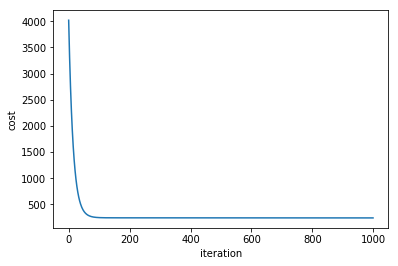

In [334]:
df2 = pd.read_csv('exchange-rates-sgd-per-unit-of-usd-daily.csv')
df2['quarter_feature'] = df2['date'].apply(date_to_quarter)
#For each quarter_feature in dataframe, get list of exchange rates for that quarter and return the last one
df['exchange_rate'] = df['quarter_feature'].apply(lambda x : get_max_exchange_quarter(x,df2))
df.corr()
X = np.array(df[['quarter_feature','exchange_rate']])
Y = np.array(df['index'])[:,np.newaxis]
num_features=2
thetas, costs = gradient_descent(X,Y,num_features,learning_rate=0.00001)
print("Thetas: {0}".format(thetas))
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()


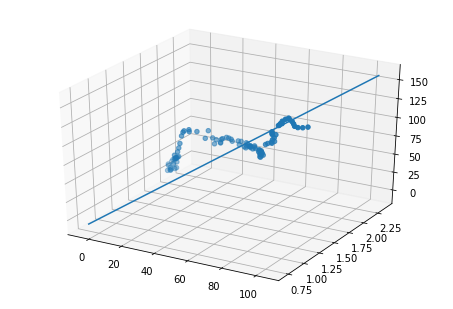

In [340]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)

x1_max = max(X[:,0]) + 5
x1_min = min(X[:,0]) - 5
x2_max = max(X[:,1]) + 0.5
x2_min = min(X[:,1]) - 0.5
x1val = np.linspace(x1_min,x1_max,1000)
x2val = np.linspace(x2_min,x2_max,1000)
yval = thetas[0] + x1val * thetas[1] + x2val * thetas[2]
ax.plot(x1val,x2val,yval)
plt.show()